# Testing the model

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
raw_data = pd.read_csv("Bank_data.csv")
raw_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,516,0.877,0.0,0.0,5.0,1.0,473.0,yes


Note that <i> interest rate</i> indicates the 3-month interest rate between banks and <i> duration </i> indicates the time since the last contact was made with a given consumer. The <i> previous </i> variable shows whether the last marketing campaign was successful with this customer. The <i>march</i> and <i> may </i> are Boolean variables that account for when the call was made to the specific customer and <i> credit </i> shows if the customer has enough credit to avoid defaulting.

We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into Boolean values in order to run regressions.

In [3]:
raw_data.describe(include='all')

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,NaN
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,NaN
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,NaN
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,NaN
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,NaN
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,NaN


In [4]:
raw_data['y_bin']=raw_data['y'].map({'no':0,'yes':1})
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y,y_bin
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no,0
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes,1
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no,0
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes,1
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no,0


# Exploaratory data analysis

In [10]:
raw_data.dtypes

Unnamed: 0         int64
interest_rate    float64
credit           float64
march            float64
may              float64
previous         float64
duration         float64
y                 object
y_bin              int64
dtype: object

In [5]:
#Missing values

raw_data.isnull().sum()


Unnamed: 0       0
interest_rate    0
credit           0
march            0
may              0
previous         0
duration         0
y                0
y_bin            0
dtype: int64

C:\Users\mihai\AppData\Local\Temp\ipykernel_22420\2861664271.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=raw_data, x="y", palette="coolwarm")


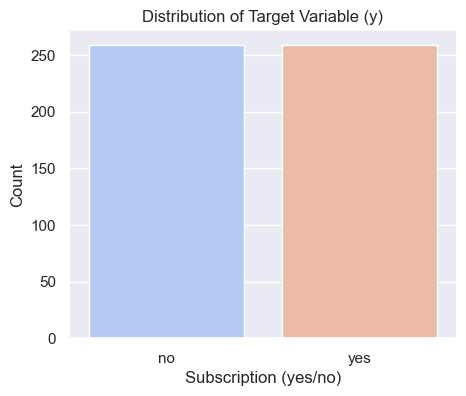

In [6]:
#Target variable distribution

plt.figure(figsize=(5,4))
sns.countplot(data=raw_data, x="y", palette="coolwarm")
plt.title("Distribution of Target Variable (y)")
plt.xlabel("Subscription (yes/no)")
plt.ylabel("Count")
plt.show()

In [8]:
# Percentage breakdown
target_counts = raw_data["y"].value_counts(normalize=True) * 100
print("\n Target Distribution (%):\n", target_counts.round(2))


 Target Distribution (%):
 y
no     50.0
yes    50.0
Name: proportion, dtype: float64


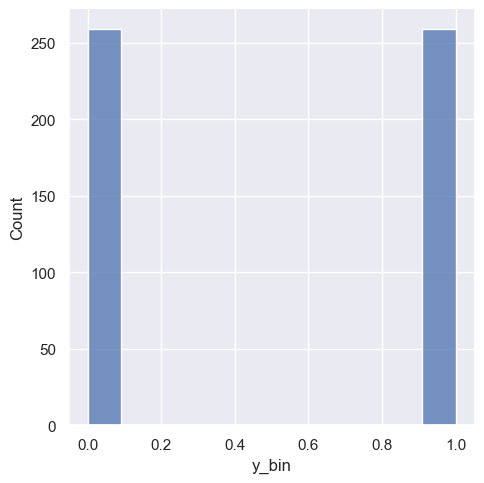

In [16]:
#Feature distribution

sns.displot(raw_data['y_bin'])

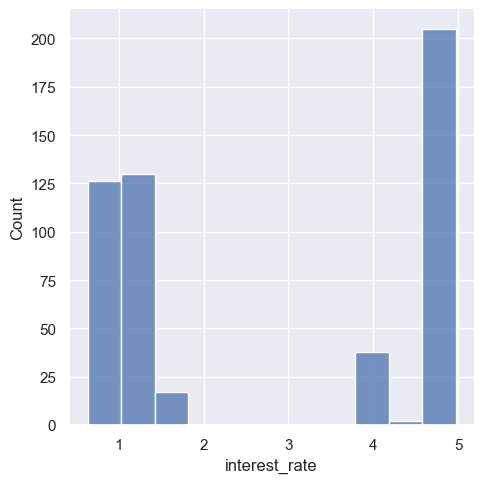

In [17]:
sns.displot(raw_data['interest_rate'])

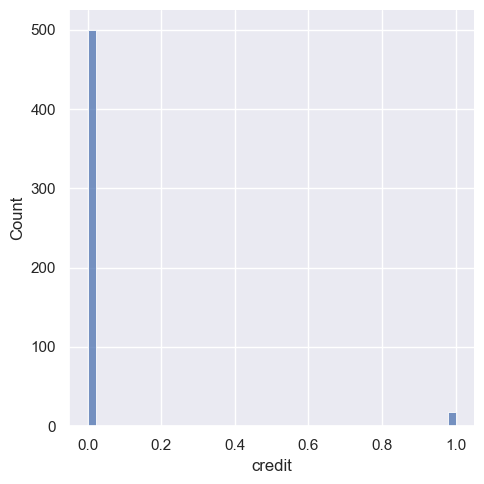

In [ ]:
sns.displot(raw_data['credit'])

#in most of the cases, the credit value is zero, which means that this variable can not give a lot of value to the model

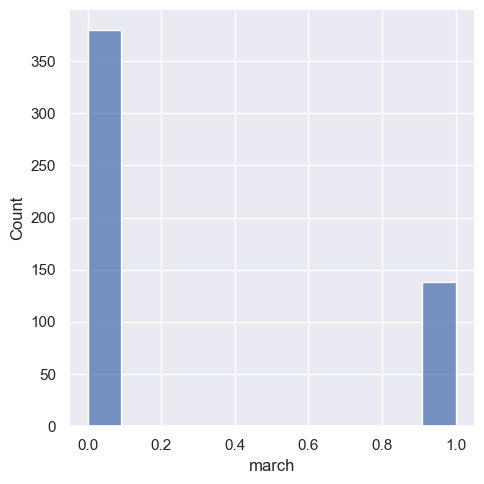

In [19]:
sns.displot(raw_data['march'])

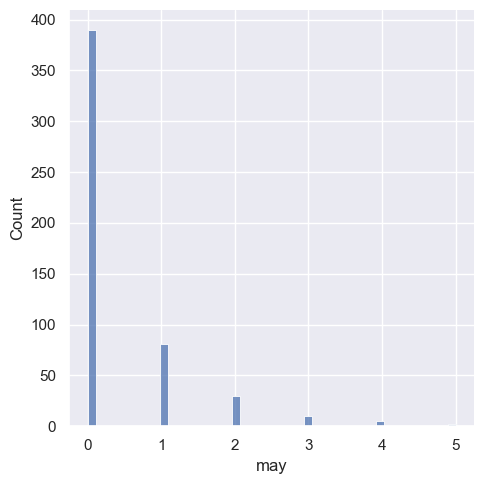

In [20]:
sns.displot(raw_data['may'])

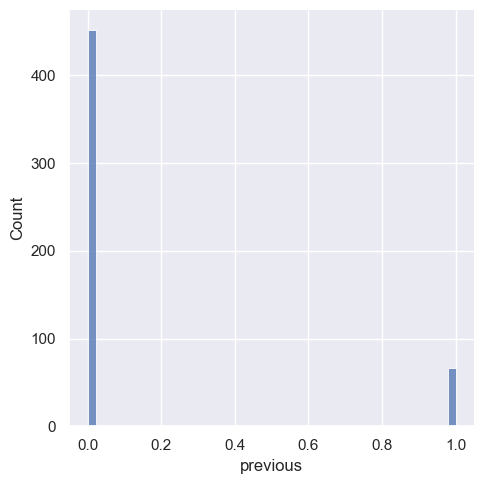

In [21]:
sns.displot(raw_data['previous'])

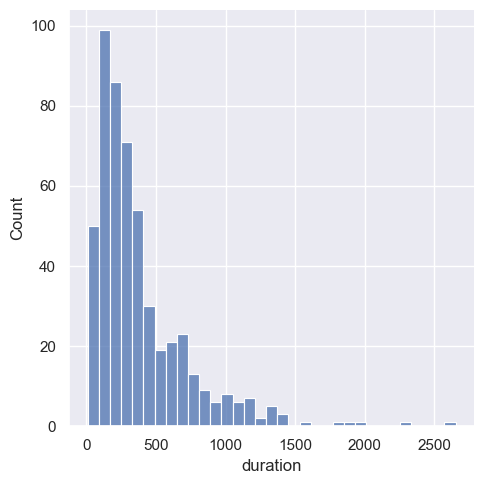

In [ ]:
sns.displot(raw_data['duration'])

#it seems that there are some outliers on the higher values of the variable - I will remove the top 1% of them

In [25]:
q = raw_data['duration'].quantile(0.99)
data_cleaned = raw_data[raw_data['duration']<q]


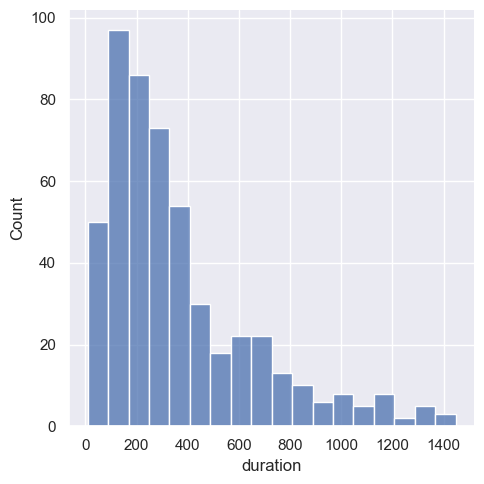

In [26]:
#plot the new data without the outliers
sns.displot(data_cleaned['duration'])

### Declare the dependent and independent variables

I will use 'duration' as the independet variable.

In [27]:
x1=data_cleaned['duration']
y=data_cleaned['y_bin']

### Simple Logistic Regression

In [28]:
x=sm.add_constant(x1)
reg = sm.Logit(y,x)

In [29]:
results=reg.fit()

Optimization terminated successfully.
         Current function value: 0.552512
         Iterations 6


In [30]:
#regression summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_bin   No. Observations:                  512
Model:                          Logit   Df Residuals:                      510
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Nov 2025   Pseudo R-squ.:                  0.2028
Time:                        21:17:02   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -354.86
Covariance Type:            nonrobust   LLR p-value:                 3.662e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6998      0.192     -8.858      0.000      -2.076      -1.324
duration       0.0051      0.001      9.151      0.000       0.004       0.006
==============================================================================
"""

Text(0, 0.5, 'Subscribed')

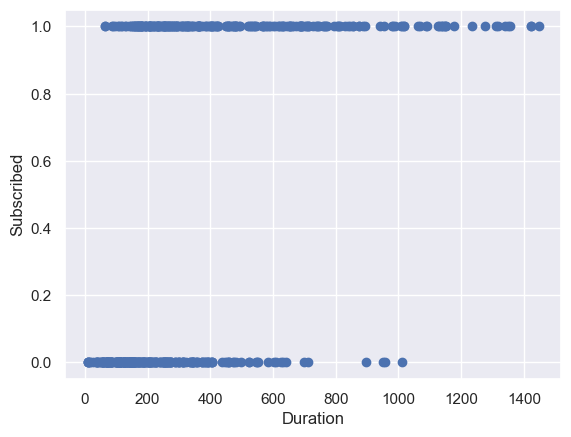

In [31]:
# Created a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y)
plt.xlabel('Duration')
plt.ylabel('Subscribed')

In [32]:
#predict the data

y_pred = results.predict(x)
y_pred

0      0.249404
1      0.425712
2      0.300221
3      0.858921
4      0.289594
         ...   
513    0.341383
514    0.918316
515    0.445815
516    0.672104
517    0.274080
Length: 512, dtype: float64

Text(0, 0.5, 'Predicted_Subscribed')

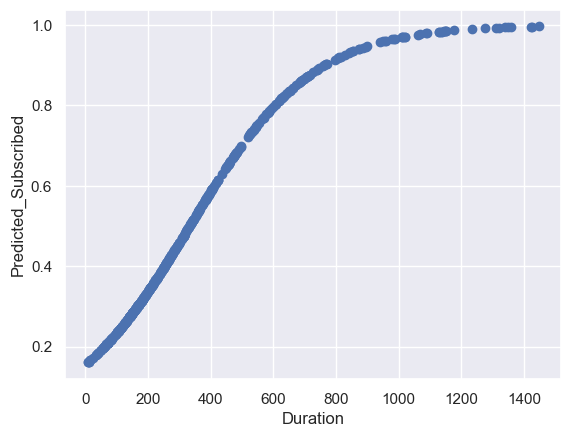

In [34]:
#scatter plot between the predicted data(y_pred) and the duraton(x)
plt.scatter(x1,y_pred)
plt.xlabel('Duration')
plt.ylabel('Predicted_Subscribed')

## Expand the model

Since the pseudo-R squered is quite low, we can be omitting many causal factors in our simple logistic model. So I will instead switch to a multivariate logistic regression model. I will add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to the model and run the regression again. 

### Declare the independent variable(s)

In [35]:
estimators=['duration','interest_rate','march','credit','previous']

x1=data_cleaned[estimators]

In [36]:
x=sm.add_constant(x1)

In [37]:
reg=sm.Logit(y,x)
results=reg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.340607
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_bin   No. Observations:                  512
Model:                          Logit   Df Residuals:                      506
Method:                           MLE   Df Model:                            5
Date:                Wed, 05 Nov 2025   Pseudo R-squ.:                  0.5086
Time:                        21:19:51   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -354.86
Covariance Type:            nonrobust   LLR p-value:                 7.753e-76
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0209      0.311     -0.067      0.946      -0.631       0.589
duration          0.0070      0.001      9.377      0.000       0.006       0.008
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
credit            2.3585      1.088      2.169      0.030       0.227       4.490
previous          1.5363      0.501      3.067      0.002       0.554       2.518
=================================================================================
"""

### Confusion Matrix

In [38]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [39]:
confusion_matrix(x,y,results)

(array([[218.,  41.],
        [ 30., 223.]]),
 np.float64(0.861328125))

## Test the model

### Load the testing data 

In [40]:
raw_data2 = pd.read_csv("Bank_data_testing.csv")


In [41]:
raw_data2.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no


### Declare the dependent and the independent variables

In [42]:
estimators=['duration','interest_rate','march','credit','previous']

x1_test=raw_data2[estimators]

In [43]:
raw_data2['y2']=raw_data2['y'].map({'no':0,'yes':1})
raw_data2

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y,y2
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no,0
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no,0
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no,0
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes,1
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no,0
...,...,...,...,...,...,...,...,...,...
217,217,4.963,0.0,0.0,0.0,0.0,458.0,yes,1
218,218,1.264,0.0,1.0,1.0,0.0,397.0,yes,1
219,219,1.281,0.0,1.0,0.0,0.0,34.0,no,0
220,220,0.739,0.0,0.0,2.0,0.0,233.0,no,0


In [44]:
y_test=raw_data2['y2']

In [45]:
x_test=sm.add_constant(x1_test)

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [46]:
confusion_matrix(x_test,y_test,results)

(array([[93., 18.],
        [13., 98.]]),
 np.float64(0.8603603603603603))

The model obtained an accuracy of 0.86 on the test data. While this is marginally lower than the training accuracy (0.861), the result demonstrates that the model generalizes well and maintains solid predictive performance.

## Predict the data

In [48]:
y_pred = results.predict(x_test)

table=pd.DataFrame()
table['y test'] = y_test
table['y predict']=y_pred
table['Residuals']=table['y test'] - table['y predict']
table

,y test,y predict,Residuals
0,0,0.618772,-0.618772
1,0,0.044279,-0.044279
2,0,0.006070,-0.006070
3,1,0.998988,0.001012
4,0,0.023171,-0.023171
...,...,...,...
217,1,0.308823,0.691177
218,1,0.474380,0.525620
219,0,0.066515,-0.066515
220,0,0.732770,-0.732770


## Distribution of Residuals

<Axes: xlabel='Residuals', ylabel='Count'>

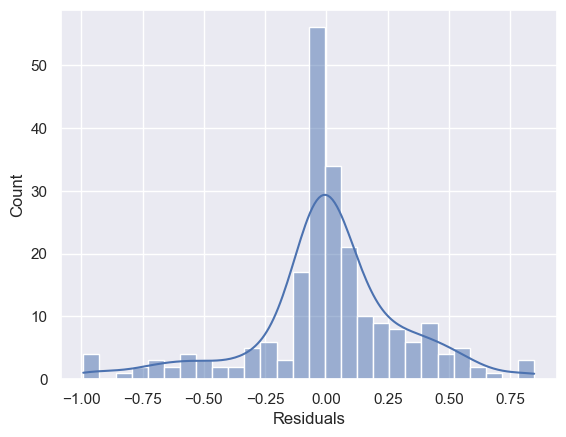

In [ ]:
sns.histplot(table['Residuals'], kde=True)

#The histogram appears roughly symmetrical, and the KDE (Kernel Density Estimate) curve reinforces this.
# A symmetrical distribution of residuals implies that the model does not systematically overpredict or underpredict.

##  Conclusion

In this project, I implemented a **Logistic Regression** model to analyze and predict categorical outcomes. I explored data preprocessing, visualization, model training, and evaluation using metrics such as accuracy and confusion matrix.

Key takeaways:
- Logistic Regression is a strong baseline for binary classification problems.
- Data cleaning and feature scaling are crucial for reliable model performance.
- Visualization helps interpret feature relationships and model results.

Next steps could include comparing logistic regression with other classification algorithms such as Decision Trees, Random Forests, or Support Vector Machines.